# Udacity Self-Driving Car Engineer Nanodegree
## Project: Build a Traffic Sign Recognition Classifier Using Keras

#### In stead of using Tensorflow as requried, I am implementating a classifer for recognizing traffic sign using deep learning and convolution neural network with Keras. 

Using TensorFlow backend.


[INFO] Loading training data
[INFO] Finished loading


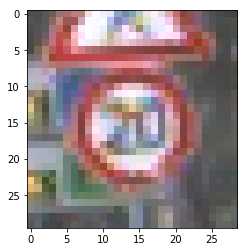

In [1]:
# The German Traffic Sign Recognition Benchmark
#
# sample code for reading the traffic sign images and the
# corresponding labels
#
# example:
#
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()
#
# have fun, Christian
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
import matplotlib.pyplot as plt
import csv
import pickle
from sklearn.utils import shuffle
import numpy as np
from sklearn import preprocessing
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
from sklearn import preprocessing

TRAING_DIR = r'D:\GermanTrafficSignDataset\GTSRB_Final_Training_Images\GTSRB\Final_Training\Images'
TESTING_DIR = r'D:\GermanTrafficSignDataset\GTSRB_Final_Test_Images\GTSRB\Final_Test\Images'

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

print('[INFO] Loading training data')
(train_imgs, train_labels) = readTrafficSigns(TRAING_DIR)
print('[INFO] Finished loading')

plt.imshow(train_imgs[0])
plt.show()



(array([ 210., 2220., 2250., 1410., 1980., 1860.,  420., 1440., 1410.,
        1470., 2010., 1320., 2100., 2160.,  780.,  630.,  420., 1110.,
        1200.,  210.,  360.,  330.,  390.,  510.,  270., 1500.,  600.,
         240.,  540.,  270.,  450.,  780.,  240.,  689.,  420., 1200.,
         390.,  210., 2070.,  300.,  360.,  240.,  240.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of

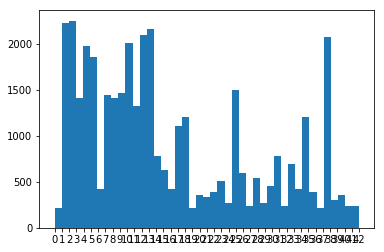

In [2]:
plt.hist(train_labels, bins=43)

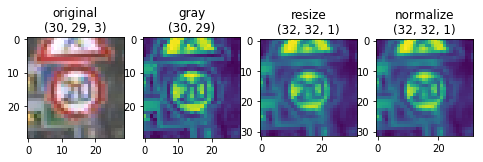

prerocessed training imgaes set = (39209, 32, 32, 1)


In [3]:
import cv2
def cvt_gray(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray

def cvt_resize(img):
    img_resize = cv2.resize(img, (32, 32))
    img_shape = img_resize.reshape(32, 32, 1)
    return img_shape

def cvt_norm(img):
    img = img.astype(np.float32)
    mean = np.mean(img)
    std = np.std(img)
    img_norm = (img - mean) / std
    return img_norm

def imgs_preprocessing(imgs, plot=True):
    imgs_preprocessed = []
    for img in imgs:
        img_org = img
        img_gray = cvt_gray(img_org)
        img_resize = cvt_resize(img_gray)
        img_norm = cvt_norm(img_resize)
        
        imgs_preprocessed.append(img_norm)
        
        if plot:
            fig=plt.figure(figsize=(8, 8))

            fig.add_subplot(1, 4, 1)
            plt.title('original\n{}'.format(imgs[0].shape))
            plt.imshow(img_org)

            fig.add_subplot(1, 4, 2)
            plt.title('gray\n{}'.format(img_gray.shape))
            plt.imshow(img_gray)

            fig.add_subplot(1, 4, 3)
            plt.title('resize\n{}'.format(img_resize.shape))
            plt.imshow(img_resize.reshape(32, 32))

            fig.add_subplot(1, 4, 4)
            plt.title('normalize\n{}'.format(img_norm.shape))
            plt.imshow(img_norm.reshape(32, 32))

            plt.show()
            plot = False
        
    return np.array(imgs_preprocessed)
    
prep_train_imgs = imgs_preprocessing(train_imgs.copy(), True)
print('prerocessed training imgaes set = {}'.format(prep_train_imgs.shape))

In [4]:
if K.image_data_format() == 'channels_first':
    prep_train_imgs = prep_train_imgs.reshape(prep_train_imgs.shape[0], 1, 32, 32)
else:
    prep_train_imgs = prep_train_imgs.reshape(prep_train_imgs.shape[0], 32, 32, 1)
print(prep_train_imgs.shape)
(train_x, val_x, train_y, val_y) = train_test_split(prep_train_imgs, train_labels, test_size=0.25, random_state=42)
lb = preprocessing.LabelBinarizer()
n_classes = len(lb.fit(train_y).classes_)

print("Number of training examples =", len(train_x), 'shape = ', train_x.shape)
print("Number of validation examples =", len(val_x), 'shape = ', val_x.shape)
print("Image data shape =", train_x[0].shape)
print("Number of classes =", n_classes)

(39209, 32, 32, 1)
Number of training examples = 29406 shape =  (29406, 32, 32, 1)
Number of validation examples = 9803 shape =  (9803, 32, 32, 1)
Image data shape = (32, 32, 1)
Number of classes = 43


In [5]:
lb.fit(train_y).classes_
train_y_bn = lb.fit_transform(train_y)
val_y_bn = lb.fit_transform(val_y)
lb.fit(train_y_bn).classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.layers.core import Dropout

class MyNet:
    def build(width, height, depth, classes):
        model = Sequential()
        model.add(Conv2D(32, (3, 3), input_shape=(width, height, depth))) #(32-2*0-3)/1 + 1 = 29+1 = 30
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2))) # 15

        model.add(Conv2D(32, (3, 3))) #(15-2*0-3)/1 + 1 = 13
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2))) #6

        model.add(Conv2D(64, (3, 3))) # 4
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2))) # 2
        
        model.add(Flatten())
        model.add(Dense(64))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model

In [9]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.layers.core import Dropout

class PanNet:
    def build(width, height, depth, classes):
        model = Sequential()
        model.add(Conv2D(32, (1, 1), activation='relu', padding='same', input_shape=(32, 32, 1)))
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

        model.add(Conv2D(512, (4, 4), activation='relu', padding='valid'))
        model.add(Dropout(0.3))
        
        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation('relu'))
        model.add(Dropout(0.3))
        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model

In [10]:
from datetime import datetime
import os
import keras
dateTimeObj = datetime.now()
 
timestampStr = dateTimeObj.strftime("%d%b%Y_%H_%M_%S")
weights_dir_path = r'./weights/{}'.format(timestampStr)
os.mkdir(weights_dir_path)

print('[INFO] compiling model')

opt = SGD(lr=0.01, momentum=0.9)
opt2 = keras.optimizers.Adam(lr=0.001)
checkpoint = ModelCheckpoint(weights_dir_path+'/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', monitor='val_acc',save_best_only=True, mode='max')
model = MyNet.build(width=32, height=32, depth=1, classes=43)
model.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])
model.summary()

[INFO] compiling model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
________________________________________________________________

In [11]:
print("[INFO] training network...")
BATCH_SIZE = 500
NUM_EPOCHS = 100
H = model.fit(train_x, train_y_bn, validation_data=(val_x, val_y_bn), callbacks=[], batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)


[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Train on 29406 samples, validate on 9803 samples
Epoch 1/100
29406/29406 [==============================] - 3s 118us/step - loss: 3.2458 - acc: 0.1556 - val_loss: 2.2833 - val_acc: 0.4641
Epoch 2/100
29406/29406 [==============================] - 1s 25us/step - loss: 2.0125 - acc: 0.4475 - val_loss: 1.1701 - val_acc: 0.7035
Epoch 3/100
29406/29406 [==============================] - 1s 25us/step - loss: 1.2995 - acc: 0.6274 - val_loss: 0.6765 - val_acc: 0.8379
Epoch 4/100
29406/29406 [==============================] - 1s 25us/step - loss: 0.9269 - acc: 0.7246 - val_loss: 0.4432 - val_acc: 0.8912
Epoch 5/100
29406/29406 [==============================] - 1s 25us/step - loss: 0.7210 - acc: 0.7822 - val_loss: 0.3562 - val_acc: 0.9115
Epoch 6/100
29406/29406 [==============================] - 1s 25us/step - loss: 0.5969 - acc: 0.8177 - val_loss: 0.2623 - val_acc: 0.9399
Epoch 7/100
29406/29406 [======================

29406/29406 [==============================] - 1s 24us/step - loss: 0.0497 - acc: 0.9829 - val_loss: 0.0291 - val_acc: 0.9937
Epoch 58/100
29406/29406 [==============================] - 1s 24us/step - loss: 0.0469 - acc: 0.9829 - val_loss: 0.0326 - val_acc: 0.9930
Epoch 59/100
29406/29406 [==============================] - 1s 24us/step - loss: 0.0490 - acc: 0.9837 - val_loss: 0.0278 - val_acc: 0.9938
Epoch 60/100
29406/29406 [==============================] - 1s 24us/step - loss: 0.0411 - acc: 0.9857 - val_loss: 0.0316 - val_acc: 0.9932
Epoch 61/100
29406/29406 [==============================] - 1s 24us/step - loss: 0.0460 - acc: 0.9854 - val_loss: 0.0291 - val_acc: 0.9929
Epoch 62/100
29406/29406 [==============================] - 1s 24us/step - loss: 0.0444 - acc: 0.9851 - val_loss: 0.0274 - val_acc: 0.9936
Epoch 63/100
29406/29406 [==============================] - 1s 25us/step - loss: 0.0469 - acc: 0.9840 - val_loss: 0.0308 - val_acc: 0.9926
Epoch 64/100
29406/29406 [==============

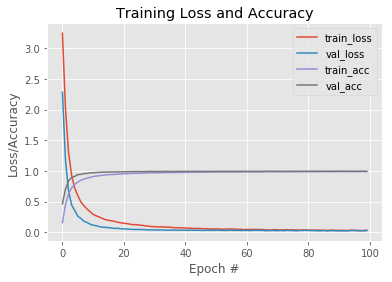

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('./obser.jpg')
plt.show()


In [13]:
print("[INFO] evaluating network...")
import csv

with open('signnames.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
labelNames = []
for (id, name) in data:
    labelNames.append(name)
labelNames = labelNames[1:]

predictions = model.predict(val_x, batch_size=128)
print(classification_report(val_y_bn.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.91      0.95        44
                              Speed limit (30km/h)       0.99      1.00      0.99       594
                              Speed limit (50km/h)       1.00      0.99      0.99       461
                              Speed limit (60km/h)       1.00      1.00      1.00       291
                              Speed limit (70km/h)       0.99      1.00      1.00       548
                              Speed limit (80km/h)       0.99      1.00      1.00       549
                       End of speed limit (80km/h)       1.00      0.99      1.00       197
                             Speed limit (100km/h)       1.00      1.00      1.00       152
                             Speed limit (120km/h)       1.00      1.00      1.00       108
                                        No passing

In [14]:
## Testing

In [15]:
from keras.models import load_model

model_path = ''
if model is None:
    print("[INFO] loading pre-trained network...")
    model = load_model(model_path)
    print("[INFO] loading Finished")
else:
    print("[INFO] Using updated model...")

[INFO] Using updated model...


[INFO] Loading testing data
[INFO] Finished loading


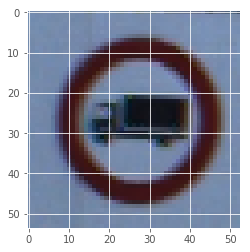

In [16]:
import glob
import csv
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def readTestingData(rootpath):
    images = [] # images
    labels = [] # corresponding labels

    test_imgs_dir = rootpath
    test_labels_path = glob.glob(test_imgs_dir + '\\' + '*.csv')[0]
    gtFile = open(test_labels_path)
    gtReader = csv.reader(gtFile, delimiter=';')
    next(gtReader) # skip header
    for row in gtReader:
        img_path = test_imgs_dir + '\\' + row[0]
        img_label = row[7]
        images.append(plt.imread(img_path))
        labels.append(img_label)
    gtFile.close()
    return images, labels

test_imgs_path = TESTING_DIR
print('[INFO] Loading testing data')
(test_imgs, test_labels) = readTestingData(test_imgs_path)
print('[INFO] Finished loading')

plt.imshow(test_imgs[0])
plt.show()


In [17]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
import matplotlib.pyplot as plt
import csv
import pickle
from sklearn.utils import shuffle
import numpy as np
from sklearn import preprocessing
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
from sklearn import preprocessing

import cv2
def cvt_gray(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray

def cvt_resize(img):
    img_resize = cv2.resize(img, (32, 32))
    img_shape = img_resize.reshape(32, 32, 1)
    return img_shape

def cvt_norm(img):
    img = img.astype(np.float32)
    mean = np.mean(img)
    std = np.std(img)
    img_norm = (img - mean) / std
    return img_norm

def imgs_preprocessing(imgs, plot=True):
    imgs_preprocessed = []
    for img in imgs:
        img_org = img
        img_gray = cvt_gray(img_org)
        img_resize = cvt_resize(img_gray)
        img_norm = cvt_norm(img_resize)
        
        imgs_preprocessed.append(img_norm)
        
        if plot:
            fig=plt.figure(figsize=(8, 8))

            fig.add_subplot(1, 4, 1)
            plt.title('original\n{}'.format(imgs[0].shape))
            plt.imshow(img_org)

            fig.add_subplot(1, 4, 2)
            plt.title('gray\n{}'.format(img_gray.shape))
            plt.imshow(img_gray)

            fig.add_subplot(1, 4, 3)
            plt.title('resize\n{}'.format(img_resize.shape))
            plt.imshow(img_resize.reshape(32, 32))

            fig.add_subplot(1, 4, 4)
            plt.title('normalize\n{}'.format(img_norm.shape))
            plt.imshow(img_norm.reshape(32, 32))

            plt.show()
            plot = False
        
    return np.array(imgs_preprocessed)

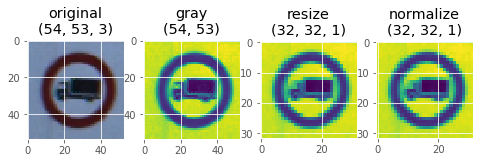

prerocessed testing imgaes set = (12630, 32, 32, 1)


In [18]:
prep_test_imgs = imgs_preprocessing(test_imgs.copy(), True)
print('prerocessed testing imgaes set = {}'.format(prep_test_imgs.shape))

In [19]:
print("[INFO] evaluating network...")
import csv

with open('signnames.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
labelNames = []
for (id, name) in data:
    labelNames.append(name)
labelNames = labelNames[1:]

if K.image_data_format() == 'channels_first':
    prep_test_imgs = prep_test_imgs.reshape(prep_test_imgs.shape[0], 1, 32, 32)
else:
    prep_test_imgs = prep_test_imgs.reshape(prep_test_imgs.shape[0], 32, 32, 1)
print(prep_test_imgs.shape)
test_x = prep_test_imgs
test_y = test_labels

lb = preprocessing.LabelBinarizer()
n_classes = len(lb.fit(test_y).classes_)

print("Number of training examples =", len(test_x), ', shape = ', test_x.shape)
print("Image data shape =", test_x[0].shape)
print("Number of classes =", n_classes)

lb.fit(test_y).classes_
test_y_bn = lb.fit_transform(test_y)
lb.fit(test_y_bn).classes_

predictions = model.predict(test_x, batch_size=128)
print(classification_report(test_y_bn.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
(12630, 32, 32, 1)
Number of training examples = 12630 , shape =  (12630, 32, 32, 1)
Image data shape = (32, 32, 1)
Number of classes = 43
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.92      0.96        60
                              Speed limit (30km/h)       0.95      0.99      0.97       720
                              Speed limit (50km/h)       0.99      0.99      0.99       660
                              Speed limit (60km/h)       0.89      0.98      0.93       420
                              Speed limit (70km/h)       0.97      0.99      0.98       690
                              Speed limit (80km/h)       0.99      1.00      0.99       720
                       End of speed limit (80km/h)       0.98      0.97      0.98       270
                             Speed limit (100km/h)       0.97      1.00      0.98       210
   